In [36]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [37]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import datetime as dt
from itertools import chain

# Reflect Tables into SQLAlchemy ORM

In [38]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [39]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [40]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect =True)


In [41]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [42]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [43]:
# Create our session (link) from Python to the DB
session  = Session(engine)


In [44]:
inspector = inspect(engine)

In [45]:
columns = inspector.get_columns('measurement')
for column in columns:
        print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [46]:
first_row_Mment= session.query(Measurement).first()
first_row_Mment.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x24cdba9b6d0>,
 'prcp': 0.08,
 'id': 1,
 'date': '2010-01-01',
 'tobs': 65.0,
 'station': 'USC00519397'}

In [47]:
columns = inspector.get_columns('station')
for column in columns:
        print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [48]:
first_row_station = session.query(Station).first()
first_row_station.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x24cd786c520>,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'id': 1,
 'latitude': 21.2716,
 'elevation': 3.0}

# Exploratory Precipitation Analysis

In [49]:
# Find the most recent date in the data set.

In [50]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column


# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data




In [51]:
last_date= session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)

('2017-08-23',)


In [52]:
first_date=session.query(Measurement.date).order_by(Measurement.date).first()
print(first_date)

('2010-01-01',)


In [53]:
date_1_year_ago = dt.date(2017,8,23)-dt.timedelta(days=365)
print(date_1_year_ago)

2016-08-23


In [54]:
# Perform a query to retrieve the data and precipitation scores
year_prcp = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= "2016-08-23").\
    filter(Measurement.date <= "2017-08-23").order_by(Measurement.date).all()
            

In [55]:
# Perform a query to retrieve the data and precipitation scores
year_prcp_df = pd.DataFrame(data=year_prcp).set_index(0)
year_prcp_df = year_prcp_df.rename(columns={1: 'precipitation'})
year_prcp_df

,precipitation
0,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


In [56]:
df = year_prcp_df.sort_values(0)
df

,precipitation
0,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.08
2017-08-23,0.00


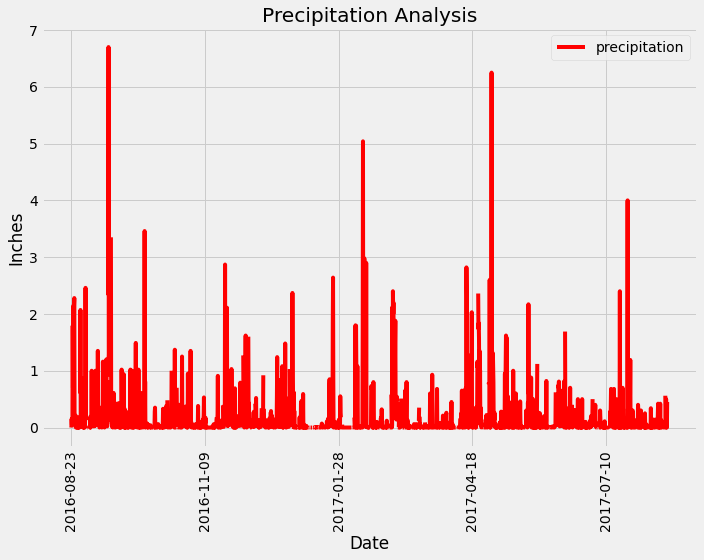

In [57]:
df.plot(figsize = (10,8), color = 'red')
plt.title("Precipitation Analysis")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [58]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [59]:
# Design a query to calculate the total number stations in the dataset
num_of_stations= session.query(Station).filter(Station.id).count()
print(num_of_stations)

9


In [60]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
stations= session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
            order_by(func.count(Measurement.station).desc()).all()
stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [61]:
active_station = stations[0][0]
print(active_station)

USC00519281


In [62]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_tem= session.query(func.min(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()
print(lowest_tem)

highest_tem= session.query(func.max(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()
print(highest_tem)

avg_tem= session.query(func.avg(Measurement.tobs)).filter(Measurement.station=='USC00519281').all()
print(avg_tem)

[(54.0,)]
[(85.0,)]
[(71.66378066378067,)]


In [63]:
last_year_tem = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date>="2016-08-23").\
                filter(Measurement.station == 'USC00519281').order_by(Measurement.date).all()


In [64]:
station_df = pd.DataFrame(data=last_year_tem).set_index(0)
station_df= station_df.rename(columns={1: 'tobs'})
station_df

,tobs
0,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


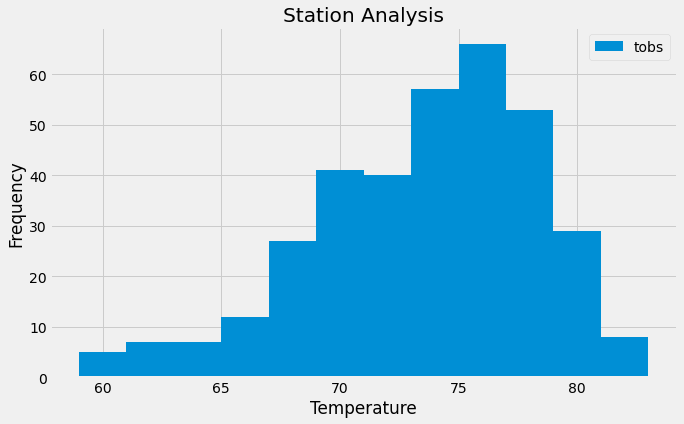

In [65]:
# plot the results as a histogram
plt.figure(figsize=(10,6))
plt.hist(station_df['tobs'], bins = 12)
plt.title("Station Analysis")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(["tobs"])
plt.show()

# Close session

In [67]:
# Close Session
session.close()